<a href="https://colab.research.google.com/github/mmohtadi/baltimore_parking_citations/blob/main/Baltimore_Parking_Citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parking Citations - City of Baltimore
The City of Baltimore maintains a database of parking citations issued within the city. More information about the dataset can be found here: (https://data.baltimorecity.gov/Transportation/Parking-Citations/n4ma-fj3m). You can download the dataset as a CSV file here:(https://data.baltimorecity.gov/api/views/n4ma-fj3m/rows.csv). Unless stated otherwise, you should only consider citations written before January 1, 2019.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
parking_citations_df = pd.read_csv('https://data.baltimorecity.gov/api/views/n4ma-fj3m/rows.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,18,19,20,21,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
parking_citations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859412 entries, 0 to 4859411
Data columns (total 28 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Citation                     int64  
 1   Tag                          object 
 2   ExpMM                        object 
 3   ExpYY                        float64
 4   State                        object 
 5   Make                         object 
 6   Address                      object 
 7   ViolCode                     int64  
 8   Description                  object 
 9   ViolFine                     float64
 10  ViolDate                     object 
 11  Balance                      float64
 12  PenaltyDate                  float64
 13  OpenFine                     float64
 14  OpenPenalty                  float64
 15  NoticeDate                   object 
 16  InvestigationStatus          object 
 17  TrialStatus                  object 
 18  GeneralStatus                object 
 19  

In [ ]:
parking_citations_df.isna().sum()

Citation                             0
Tag                                305
ExpMM                            93298
ExpYY                               31
State                                1
Make                              3843
Address                              7
ViolCode                             0
Description                          0
ViolFine                             0
ViolDate                          4454
Balance                              0
PenaltyDate                    4859412
OpenFine                             0
OpenPenalty                          0
NoticeDate                     2677221
InvestigationStatus            4842716
TrialStatus                    4749310
GeneralStatus                  4511627
GroupID                        4511655
ImportDate                      924008
Neighborhood                   4455400
PoliceDistrict                 4455394
CouncilDistrict                4455367
Location                       3171058
2010 Census Neighborhoods

In [ ]:
parking_citations_df.drop(['ExpMM', 'ExpYY'], axis = 1, inplace = True)

In [ ]:
parking_citations_df.dropna(how = 'any', subset = ['ViolCode', 'PoliceDistrict'], inplace = True)

In [ ]:
parking_citations_df.reset_index(drop = True, inplace = True)

In [ ]:
i = 0
for dist in parking_citations_df['PoliceDistrict']:
    if dist == 'CENTRAL':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Central'
    elif dist == 'NORTHERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Northern'
    elif dist == 'SOUTHERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Southern'
    elif dist == 'EASTERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Eastern'
    elif dist == 'WESTERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Western'
    elif dist == 'NORTHEASTERN' or dist == 'Notheastern':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Northeastern'
    elif dist == 'NORTHWESTERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Northeastern'
    elif dist == 'SOUTHEASTERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Southeastern'
    elif dist == 'SOUTHWESTERN':
        parking_citations_df.loc[[i], ['PoliceDistrict']] = 'Southwestern'
    i += 1

In [ ]:
i = 0
for dist in parking_citations_df['Make']:
    if dist == 'ACUR':
        parking_citations_df.loc[[i], ['Make']] = 'ACURA'
    elif dist == 'AUOI':
        parking_citations_df.loc[[i], ['Make']] = 'AUDI'
    elif dist == '.NISS':
        parking_citations_df.loc[[i], ['Make']] = 'NISSN'
    elif dist == 'B0AT':
        parking_citations_df.loc[[i], ['Make']] = 'BOAT'
    elif dist == 'BUIC':
        parking_citations_df.loc[[i], ['Make']] = 'BUICK'
    elif dist == 'CHEV':
        parking_citations_df.loc[[i], ['Make']] = 'CHEVY'
    elif dist == 'CHEVR':
        parking_citations_df.loc[[i], ['Make']] = 'CHEVY'
    elif dist == 'CHRY':
        parking_citations_df.loc[[i], ['Make']] = 'CHRYS'
    elif dist == 'CADI':
        parking_citations_df.loc[[i], ['Make']] = 'CADIL'
    elif dist == 'COM.':
        parking_citations_df.loc[[i], ['Make']] = 'COMMV'
    elif dist == 'DISP':
        parking_citations_df.loc[[i], ['Make']] = 'DISPL'
    elif dist == 'DOD':
        parking_citations_df.loc[[i], ['Make']] = 'DODGE'
    elif dist == 'DODG':
        parking_citations_df.loc[[i], ['Make']] = 'DODGE'
    elif dist == 'FAIT':
        parking_citations_df.loc[[i], ['Make']] = 'FIAT'    
    elif dist == 'FLAL':
        parking_citations_df.loc[[i], ['Make']] = 'FLAT'
    elif dist == 'FORD1':
        parking_citations_df.loc[[i], ['Make']] = 'FORD'
    elif dist == 'FRE':
        parking_citations_df.loc[[i], ['Make']] = 'FREIG'
    elif dist == 'FREI':
        parking_citations_df.loc[[i], ['Make']] = 'FREIG'
    elif dist == 'FREIT':
        parking_citations_df.loc[[i], ['Make']] = 'FREIG'
    elif dist == 'FRI':
        parking_citations_df.loc[[i], ['Make']] = 'FREIG'
    elif dist == 'FRIGH':
        parking_citations_df.loc[[i], ['Make']] = 'FREIG'
    elif dist == 'H0NDA':
        parking_citations_df.loc[[i], ['Make']] = 'HONDA'
    elif dist == 'HARLE':
        parking_citations_df.loc[[i], ['Make']] = 'HARLY'
    elif dist == 'HO':
        parking_citations_df.loc[[i], ['Make']] = 'HONDA'
    elif dist == 'HOND':
        parking_citations_df.loc[[i], ['Make']] = 'HONDA'
    elif dist == 'HYUN':
        parking_citations_df.loc[[i], ['Make']] = 'HYUND'
    elif dist == 'INFI':
        parking_citations_df.loc[[i], ['Make']] = 'INFIN'
    elif dist == 'ISU':
        parking_citations_df.loc[[i], ['Make']] = 'ISUZU'
    elif dist == 'ISUZ':
        parking_citations_df.loc[[i], ['Make']] = 'ISUZU'
    elif dist == 'JAG':
        parking_citations_df.loc[[i], ['Make']] = 'JAGUA'
    elif dist == 'JAGU':
        parking_citations_df.loc[[i], ['Make']] = 'JAGUA'
    elif dist == 'KAW':
        parking_citations_df.loc[[i], ['Make']] = 'KAWAS'
    elif dist == 'KAWA':
        parking_citations_df.loc[[i], ['Make']] = 'KAWAS'
    elif dist == 'LAND':
        parking_citations_df.loc[[i], ['Make']] = 'LANDR'
    elif dist == 'LNDR':
        parking_citations_df.loc[[i], ['Make']] = 'LANDR'
    elif dist == 'LEXS':
        parking_citations_df.loc[[i], ['Make']] = 'LEXUS'
    elif dist == 'LEXU':
        parking_citations_df.loc[[i], ['Make']] = 'LEXUS'
    elif dist == 'LINC':
        parking_citations_df.loc[[i], ['Make']] = 'LINCO'
    elif dist == 'MASE':
        parking_citations_df.loc[[i], ['Make']] = 'MASER'
    elif dist == 'MAZD':
        parking_citations_df.loc[[i], ['Make']] = 'MAZDA'
    elif dist == 'MERC':
        parking_citations_df.loc[[i], ['Make']] = 'MERCU'
    elif dist == 'MERCE':
        parking_citations_df.loc[[i], ['Make']] = 'MERCU'
    elif dist == 'MERZ':
        parking_citations_df.loc[[i], ['Make']] = 'BENZ'
    elif dist == 'MEZ':
        parking_citations_df.loc[[i], ['Make']] = 'BENZ'
    elif dist == 'MINI':
        parking_citations_df.loc[[i], ['Make']] = 'MINIC'
    elif dist == 'MINI-':
        parking_citations_df.loc[[i], ['Make']] = 'MINIC'
    elif dist == 'MITO':
        parking_citations_df.loc[[i], ['Make']] = 'MITSU'
    elif dist == 'MITS':
        parking_citations_df.loc[[i], ['Make']] = 'MITSU'
    elif dist == 'NISSA':
        parking_citations_df.loc[[i], ['Make']] = 'NISSN'
    elif dist == 'NISS':
        parking_citations_df.loc[[i], ['Make']] = 'NISSN'
    elif dist == 'OLDS':
        parking_citations_df.loc[[i], ['Make']] = 'OLDSM'   
    elif dist == 'OTH':
        parking_citations_df.loc[[i], ['Make']] = 'OTHER'
    elif dist == 'OTHE':
        parking_citations_df.loc[[i], ['Make']] = 'OTHER'
    elif dist == 'OTHEH':
        parking_citations_df.loc[[i], ['Make']] = 'OTHER'
    elif dist == 'PARK':
        parking_citations_df.loc[[i], ['Make']] = 'PARKE'     
    elif dist == 'PLYM':
        parking_citations_df.loc[[i], ['Make']] = 'PLYMO'
    elif dist == 'PONI':
        parking_citations_df.loc[[i], ['Make']] = 'PONTI'   
    elif dist == 'PONT':
        parking_citations_df.loc[[i], ['Make']] = 'PONTI'
    elif dist == 'PORCH':
        parking_citations_df.loc[[i], ['Make']] = 'PORSC'
    elif dist == 'PORS':
        parking_citations_df.loc[[i], ['Make']] = 'PORSC'
    elif dist == 'PARK':
        parking_citations_df.loc[[i], ['Make']] = 'PARKE'
    elif dist == 'R ROV':
        parking_citations_df.loc[[i], ['Make']] = 'RROVE'
    elif dist == 'RANGE':
        parking_citations_df.loc[[i], ['Make']] = 'RROVE'
    elif dist == 'RROV':
        parking_citations_df.loc[[i], ['Make']] = 'RROVE'
    elif dist == 'SA':
        parking_citations_df.loc[[i], ['Make']] = 'SAAB'
    elif dist == 'SAA':
        parking_citations_df.loc[[i], ['Make']] = 'SAAB'
    elif dist == 'SATR':
        parking_citations_df.loc[[i], ['Make']] = 'SATUR'
    elif dist == 'SATU':
        parking_citations_df.loc[[i], ['Make']] = 'SATUR'
    elif dist == 'SCIO':
        parking_citations_df.loc[[i], ['Make']] = 'SCION'
    elif dist == 'SMAR':
        parking_citations_df.loc[[i], ['Make']] = 'SMART'   
    elif dist == 'SUBA':
        parking_citations_df.loc[[i], ['Make']] = 'SUBAR'
    elif dist == 'SUKI':
        parking_citations_df.loc[[i], ['Make']] = 'SUZUK'
    elif dist == 'SUZ':
        parking_citations_df.loc[[i], ['Make']] = 'SUZUK'
    elif dist == 'SUZI':
        parking_citations_df.loc[[i], ['Make']] = 'SUZUK'     
    elif dist == 'SUZU':
        parking_citations_df.loc[[i], ['Make']] = 'SUZUK'
    elif dist == 'TOYT':
        parking_citations_df.loc[[i], ['Make']] = 'TOYOT'   
    elif dist == 'U HAU':
        parking_citations_df.loc[[i], ['Make']] = 'UHAUL'
    elif dist == 'UNK':
        parking_citations_df.loc[[i], ['Make']] = 'UNKNO'
    elif dist == 'UNKN':
        parking_citations_df.loc[[i], ['Make']] = 'UNKNO'
    elif dist == 'UNKN0':
        parking_citations_df.loc[[i], ['Make']] = 'UNKNO'       
    elif dist == 'UNKWN':
        parking_citations_df.loc[[i], ['Make']] = 'UNKNO'
    elif dist == 'VOLK':
        parking_citations_df.loc[[i], ['Make']] = 'VOLKS'
    elif dist == 'VOLO':
        parking_citations_df.loc[[i], ['Make']] = 'VOLVO'
    elif dist == 'VOLV':
        parking_citations_df.loc[[i], ['Make']] = 'VOLVO'
    elif dist == 'VW':
        parking_citations_df.loc[[i], ['Make']] = 'VOLKS'
    elif dist == 'YAMA':
        parking_citations_df.loc[[i], ['Make']] = 'YAMAH'
    i += 1

In [ ]:
make_drop = parking_citations_df['Make'].value_counts()[parking_citations_df['Make'].value_counts() < 10].index
make_drop_index = parking_citations_df[parking_citations_df['Make'].isin(make_drop)].index
parking_citations_df.drop(index = make_drop_index, inplace = True)

In [ ]:
parking_citations_df.reset_index(drop = True, inplace = True)

In [ ]:
parking_citations_df[['Citation', 'ViolCode']] = parking_citations_df[['Citation', 'ViolCode']].astype(int)

In [ ]:
parking_citations_df[['ViolDate', 'PenaltyDate', 'NoticeDate', 'ImportDate']] = \
parking_citations_df[['ViolDate', 'PenaltyDate', 'NoticeDate', 'ImportDate']].astype('datetime64[D]')

#### For all citations, what is the mean violation fine?

In [ ]:
viol_fine_mean_total = parking_citations_df['ViolFine'][parking_citations_df['ViolDate'] < '2019-01-01'].mean()
viol_fine_mean_total

50.54528691223603

#### Looking only at vehicles that have open penalty fees, what dollar amount is the 81st percentile of that group?

In [ ]:
viol_fine_percentile_81 = parking_citations_df['ViolFine'].describe(percentiles = [0.81])[5]
viol_fine_percentile_81

52.0

#### Find the police district that has the highest mean violation fine. What is that mean violation fine? Keep in mind that Baltimore is divided into nine police districts, so clean the data accordingly.

In [ ]:
police_dist = parking_citations_df['PoliceDistrict'].sort_values().unique()
for dist in police_dist:
    print(dist, ':', parking_citations_df['ViolFine'][parking_citations_df['PoliceDistrict'] == dist].mean())

Central : 45.069654762690604
Eastern : 51.005693436510164
Northeastern : 61.27864549993599
Northern : 48.57254765904609
Northwestern : 61.08364611260053
Southeastern : 50.166710654656036
Southern : 55.39105642256903
Southwestern : 58.499898208469055
Western : 53.84131017278019


#### Find the ten vehicle makes that received the most citations during 2017. For those top ten, find all Japanese-made vehicles. What proportion of all citations were written for those vehicles? Note that the naming in Make is not consistent over the whole dataset, so you will need to clean the data before calculating your answer. Your answer should be expressed as a decimal number (i.e. 0.42, not 42).

In [ ]:
make_citations_2017 = parking_citations_df['Make'][parking_citations_df['ViolDate'].dt.year == 2017].value_counts()
make_top_ten_citations_2017 = make_citations_2017.nlargest(n = 10)
make_top_ten_citations_2017

HONDA    7793
TOYOT    7058
FORD     6562
CHEVY    5263
NISSN    5079
HYUND    2737
DODGE    2428
JEEP     2013
ACURA    1936
VOLKS    1846
Name: Make, dtype: int64

In [ ]:
make_japanese = ['HONDA', 'TOYOT', 'NISSA', 'ACURA', 'LEXUS', 'INFIN', 'MAZDA', 'SUBAR', 'MITSU', 'ISUZU', 'SUZUK']
make_japanese_citations = parking_citations_df['Make'][parking_citations_df['Make'].isin(make_japanese)].value_counts()
make_japanese_top_ten_citations = make_japanese_citations.nlargest(n = 10)
make_japanese_top_ten_citations

HONDA    48118
TOYOT    42982
ACURA    12569
MAZDA     8914
LEXUS     8592
SUBAR     7348
INFIN     5402
MITSU     3518
SUZUK      722
ISUZU      659
Name: Make, dtype: int64

In [ ]:
make_citations = parking_citations_df['Make'].value_counts()
make_top_ten_citations = make_citations.nlargest(n = 10)
make_japanese_top_ten_citations.sum()/make_top_ten_citations.sum()

0.5003315745466078

#### First, find the total number of citations given in each year between 2004 and 2014 (inclusive). Next, using linear regression, create a function that plots the total number of citations as a function of the year. If you were to plot a line using this function, what would be the slope of that line?

In [ ]:
parking_citations_2004_2014_total = []
parking_citations_year = []
for year in range(2004, 2015):
    parking_citations_2004_2014_total.append( \
    parking_citations_df['ViolFine'][parking_citations_df['ViolDate'].dt.year == year].sum())
    parking_citations_year.append(year)

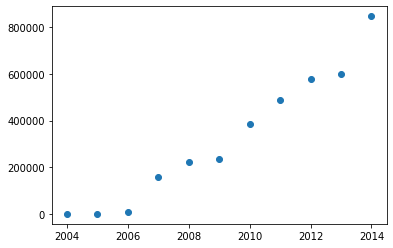

In [ ]:
plt.scatter(parking_citations_year, parking_citations_2004_2014_total)
plt.show()